# 5 Modelling - Task 4

## Import and Initializing

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model, metrics, preprocessing, pipeline  # pip3 install sklearn --user
from scipy import optimize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

FIGSIZE = (16,4)

In [2]:
dataset = pd.read_excel("../datasets/DB01_gaming_video_quality_dataset.xlsx")

# calculate MOS
mos_by_game_condition = dataset.groupby(["Game", "Condition"]).mean()

#calculate bit per pixel
num_pixels = {
    480: 720 * 480,
    720: 1280 * 720,
    1080: 1920 * 1080
}

def count_pixels(resolution):
    return num_pixels[int(resolution)]

mos_by_game_condition["num_pixels"] = mos_by_game_condition.Resolution.transform(count_pixels)
mos_by_game_condition["bitperpixel"] = mos_by_game_condition.Bitrate / mos_by_game_condition.num_pixels

## Non-linear regressions

Fitted function: 7520.232533640273 * exp(--0.006079687647777501 * x) + -7516.537820364376


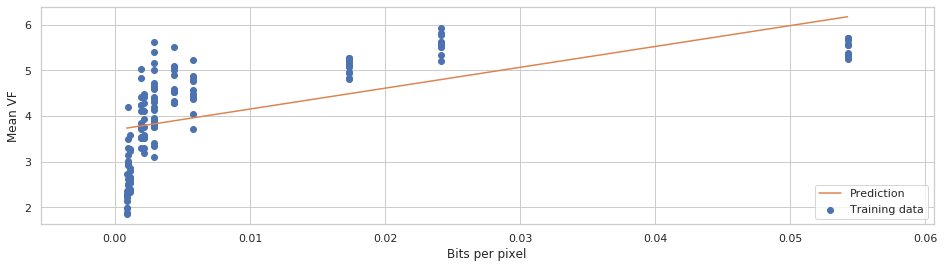

In [3]:
X = mos_by_game_condition.bitperpixel.values
y = mos_by_game_condition.VF.values

def exponential(x, a, b, c):
    """From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html"""
    return a * np.exp(-b * x) + c

popt, pcov = optimize.curve_fit(exponential, X, y)
a, b, c = popt
print(f"Fitted function: {a} * exp(-{b} * x) + {c}")

X_predict = np.linspace(np.min(X), np.max(X), num=len(X))
y_predict = exponential(X_predict, *popt)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(X, y, label="Training data")
ax.plot(X_predict, y_predict, c="C1", label="Prediction")
ax.set_xlabel("Bits per pixel")
ax.set_ylabel("Mean VF")
ax.legend()
None

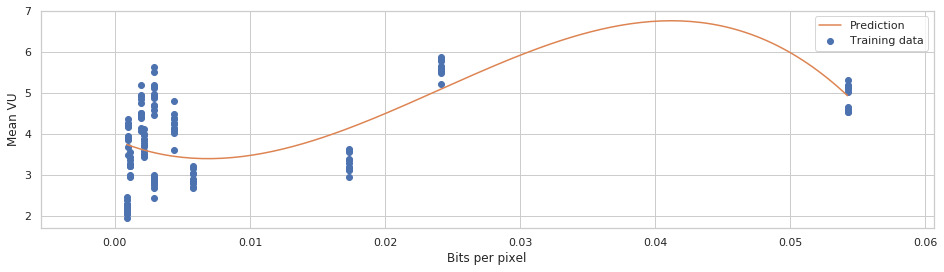

In [4]:
X = mos_by_game_condition[["bitperpixel"]].values
y = mos_by_game_condition[["VU"]].values

model = pipeline.make_pipeline(
    preprocessing.PolynomialFeatures(degree=3), linear_model.LinearRegression()
)
model.fit(X, y)

X_predict = np.linspace(np.min(X), np.max(X), num=len(X)).reshape(-1, 1)
y_predict = model.predict(X_predict)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(X, y, label="Training data")
ax.plot(X_predict, y_predict, c="C1", label="Prediction")
ax.set_xlabel("Bits per pixel")
ax.set_ylabel("Mean VU")
ax.legend()
None

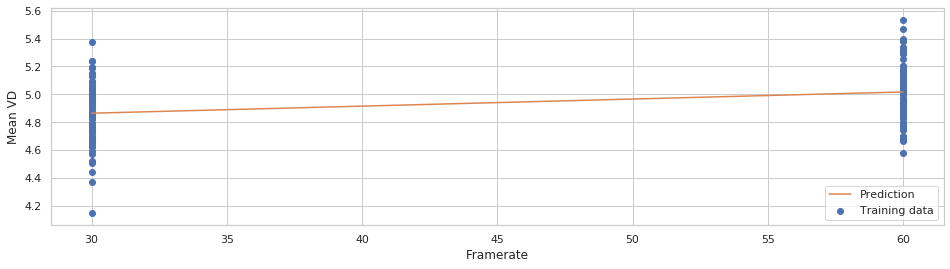

In [5]:
X = mos_by_game_condition.Framerate.values.reshape(-1, 1)
y = mos_by_game_condition.VD.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X, y)

X_predict = np.array([30, 60]).reshape(-1, 1)
y_predict = model.predict(X_predict)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(X, y, label="Training data")
ax.plot(X_predict, y_predict, c="C1", label="Prediction")
ax.set_xlabel("Framerate")
ax.set_ylabel("Mean VD")
ax.legend()
None